<a href="https://colab.research.google.com/github/bdadeveloper1/MachineLearningProjects/blob/main/rocketLandingReinforcementLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#World Data Science Institute Internship
#Simple Rocket Landing with Reinforcement Learning
#Deep Reinforcement Learning 
By Brandon Oppong-Antwi



---

Important Notes on Installations:

Python Version: Python 3.8.3

Tensorflow Version: Tensorflow 2.3.0

Pytorch Version: Pytorch  1.6.0 with CUDA 101

Operating System: Windows 10


##Rocket Landing Theory and Logic

Reinforcement Learning is a powerful part of artifiical intelligence that allows machines and algorithms to reach optimal behaviour by trial and eroor that is reinforced by a positive reward. Similar to toddlers learning how to walk who adjust actions based on the outcomes they experiece.

In this specific task, we will use the OpenAI prebuilt virtual gym enviroment, which will give us an environment in which we can teach our model how to land a rocket easily. You will see how this agent initially does not know anything about how to control and land a rocket, but with time it learns from its mistakes and start to improve its performance and in the end learns to fully control the rocket and how to perfectly land on it.


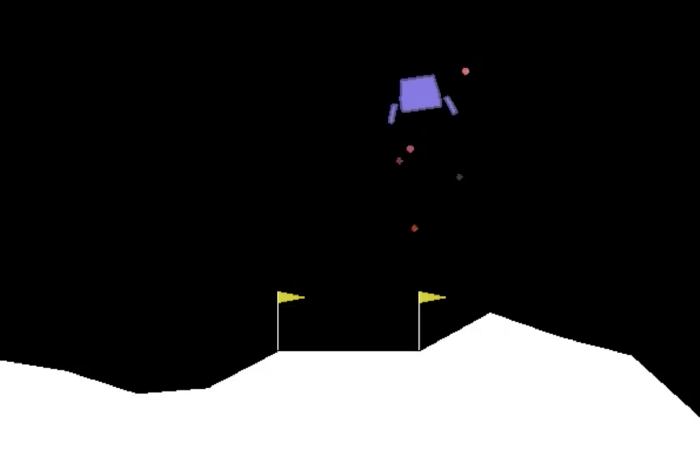


## Colab Preambles and Installation Requirements

Most of the requirements of python packages are already fulfilled on CoLab. However, in order to create a virtual display and environment for our model we need to create a neural network with the pytorch to run  OpenAI gym, you have to install prerequisites like xvbf,opengl & other python-dev packages using the following codes:

In [ ]:
# Special gym environment
!pip install gym[atari]

# For rendering environment, you can use pyvirtualdisplay.
!pip install pyvirtualdisplay
!pip install piglet

# Install packages for running gym-retro virtual environment. Allows all our previous imports to be retrievable in Google Colab
!apt-get update 
!apt-get install -y lua5.1 libav-tools
!apt-get install python-opengl -y
!apt install xvfb -y


# To activate virtual display 
# need to run a script once for training an agent as follows
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

# This code creates a virtual display to draw game images on. 
# If you are running locally on a machine you can just ignore it. In Google Colab you will want to run this
import os #allows us to operate on operating system irrespective of importing os module
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY"))==0: #acess environment variables from operating system
    !bash ../xvfb start
    %env DISPLAY=:1

#Install packages of tensorflow for machine learning 
!pip install tensorflow as tf

# Install packages of all OpenAI gym virtual environment
!bash install.sh
!pip install gym[all]
!pip install box2d-py 
!pip install box2d
!pip install gym[Box_2D]

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:5 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Fetched 252 kB in 2s (125 kB/s)
Reading package lists... Done
Reading package lists... Done
Building de

## Install Dependencies

In [ ]:

# toolkit for developing and comparing Reinforcement Learning algorithms. 
# Comes with four functions that will be initialized later in order to create virtual environment
import gym 

# tuple is a memory-efficient shortcut to defining an immutable class in Python manually.
#Allows us to create series of helper methods typically with an _ underscore so that our code is easier and more compact
from collections import namedtuple

import numpy as np #Numpy provides fast mathematical function processing
import tensorflow as tf #library that allows users to create neural network and machine learning models


import torch #open source framework known as Pytorch that is used for machine learning and scientific computing 
import torch.nn as nn # PyTorch provides the torch. nn module to help us in creating and training of the neural network. 
import torch.optim as optim #package implementing various optimization algorithms. Allows us to construct optimizer objects, that will hold the current state and will update the parameters based on the computed gradients.
import torch.nn.functional as F # module(usually imported into the F namespace by convention) which contains activation functions, loss functions, etc, as well as non-stateful versions of layers such as convolutional and linear layers.

## Neural Network


---

In order for our model rocket to learn how to land we are going to use a neural network that learns to approximate what action to take depending on the state that was given as input to the network. Instead of creating one from scratch we use Pytorch which comes with a standard neural network architecture and convention that makes the process easier. 


---


First we make a new class called Net which inherits from the nn.Module class (import torch.nn). This is where we initialise our two fully connected layers which comprise the core of our neural network. The first fully connected layer (fc1) is our input layer which takes in a tensor the same size as our state size and outputs a tensor that is the size of our hidden nodes (in this case its 200). The second fully connected layer (fc2) is our hidden layer, it takes in the output from our previous layer and outputs a tensor that is the size of our action space (in this case 4) it will output a number for each possible action our agent can take.

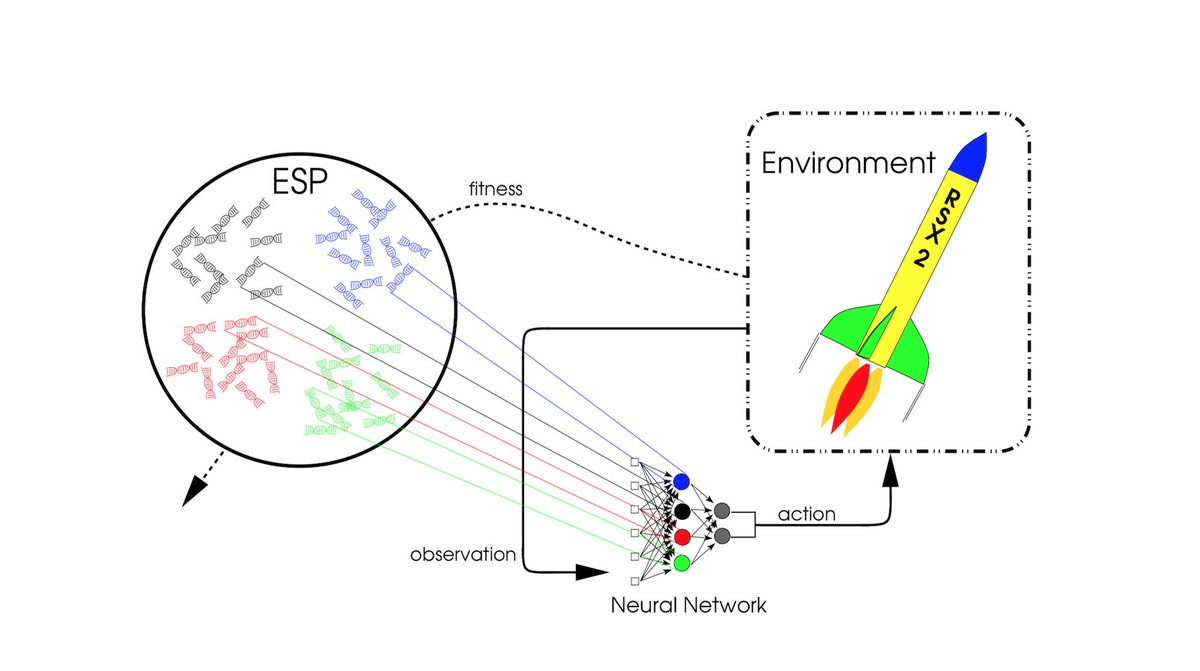

In [ ]:
class Net(nn.Module): #intializes our Neural Network classes
    def __init__(self, obs_size, hidden_size, n_actions): #creates the basic framework for our two layer neural network. Optimizer _init_ constructor from optim package initializes the attributes of our neural network
        super(Net, self).__init__() #self allows us to acess the attributes and methods in our class
        self.fc1 = nn.Linear(obs_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, n_actions)

#Creation of our foward method. This is required method by the nn.Model class. 
#This method is automatically used when we pass in data into our network object. 
#You can see below that we take in a tensor x which is the game state the agent is  at a particular instance in time. 
#We pass that state through the first layer of our neural network and apply a ReLU activation function to the output of fc1. 
#Next we take that output and pass it through our second layers. This value is then returned as the output of the whole network.
      
    def forward(self, x):
        x = F.relu(self.fc1(x)) #activation function
        return self.fc2(x)


## Generate Sessions



---

This is how we generate our batch of episodes. The agent will play through N episodes and gather the actions/states for each step so we can effecitently  train our agent. activation function, as we described earlier. Next we need three lists to store our episode data. The first two are batch_actions and batch_states. 

In [ ]:
def generate_batch(env,batch_size, t_max=5000):
    
    activation = nn.Softmax(dim=1) #creates an activation fuction.Using softmax, we get a set of probabilities that add up to 1
    batch_actions,batch_states, batch_rewards = [],[],[] #three list episodes to stour our data
    
    for b in range(batch_size): #iterates through every episode in our batch size running an episode for each iteration
        states,actions = [],[] #stores our action and states for a particular episode
        total_reward = 0
        s = env.reset() #initialize our state variable s with a new start episode

        for t in range(t_max): #a second loop that carrys out a single step in the game environment up until we reach our time limit for that episode
            
            s_v = torch.FloatTensor([s]) #grab the current state and pass it through. Turn it into a torch float sensor so we can input into the network
            act_probs_v = activation(net(s_v)) #apply our activation function in order for probabilities of action to add to 1 and be usable
            act_probs = act_probs_v.data.numpy()[0] #decides which action to take once probability distrubtion is retrieved
            a = np.random.choice(len(act_probs), p=act_probs) # numpys random.choice. choose a random action based on probaility fed.
  
            new_s, r, done, info = env.step(a) #state, action, and reward to our data variables at each step

            #record sessions like you did before
            states.append(s)
            actions.append(a)
            total_reward += r

            s = new_s

            #check if the episode has finished during this step. 
            #If done is True we simply add our actions, states and rewards to their corresponding batch lists. Then break
            if done:
                batch_actions.append(actions)
                batch_states.append(states)
                batch_rewards.append(total_reward)
                break
                
    return batch_states, batch_actions, batch_rewards #return our batch data

## Filter Best Episodes



---

This method is used to select only the best episodes from the latest batch. Find the reward threshold, in our case this is the top 20% or the 80th percentile but feel free to play around with that number, and then just take the episode data from episodes with a reward ≥ our reward threshold.


In [ ]:
def filter_batch(states_batch,actions_batch,rewards_batch,percentile=50):
    
    reward_threshold = np.percentile(rewards_batch, percentile)
    
    elite_states = []
    elite_actions = []
    
    
    for i in range(len(rewards_batch)):
        if rewards_batch[i] > reward_threshold: #compares each from previous instances
            for j in range(len(states_batch[i])):
                elite_states.append(states_batch[i][j])
                elite_actions.append(actions_batch[i][j])
    
    return elite_states,elite_actions
    

## Carry Out Training

This the initilization of our parameters. All of the variables can be played with in order to effectively get enough data so that the rocket can land. I have changed the session_size from 500 to 10 so that we can see the model in action instead of actually seeing it land.

In [ ]:
#Training our Data

batch_size = 100 # how many episodes to run at once
session_size = 10 # how many training epochs. each epoch runs one batch. 
percentile = 80 # used to determine our elite reward threshold
hidden_size = 200 # hidden layer size of our neural network
completion_score = 200 # average reward over 100 episodes to be considered solved
learning_rate = 0.01 # denotes how much we update our network by during each training step (need to find a good middle ground for this one)

env = gym.make('LunarLander-v2') #makes environment with rocket known in OpenAI as lundar lander
n_states = env.observation_space.shape[0]
n_actions = env.action_space.n

#neural network
net = Net(n_states, hidden_size, n_actions)
#loss function
objective = nn.CrossEntropyLoss() #calculate the cross entropy loss to find out how far off our predictions were
#optimisation function
optimizer = optim.Adam(params=net.parameters(), lr=learning_rate) #gradient descent optimazation function from RMSProp

for i in range(session_size):
    #generate new sessions
    batch_states,batch_actions,batch_rewards = generate_batch(env, batch_size, t_max=5000) #generate our batch sessions

    elite_states, elite_actions = filter_batch(batch_states,batch_actions,batch_rewards,percentile)
    
    optimizer.zero_grad() #optimizer for gradient
    tensor_states = torch.FloatTensor(elite_states) #tensors to feed network
    tensor_actions = torch.LongTensor(elite_actions)
    action_scores_v = net(tensor_states)
    loss_v = objective(action_scores_v, tensor_actions) #calculating loss
    loss_v.backward()
    optimizer.step()

    #show results
    mean_reward, threshold = np.mean(batch_rewards), np.percentile(batch_rewards, percentile)
    print("%d: loss=%.3f, reward_mean=%.1f, reward_threshold=%.1f" % (
            i, loss_v.item(), mean_reward, threshold))
    
    #check if 
    if np.mean(batch_rewards)> completion_score:
        print("Environment has been successfullly completed!")

0: loss=1.382, reward_mean=-196.5, reward_threshold=-102.6
1: loss=1.361, reward_mean=-181.1, reward_threshold=-85.5
2: loss=1.324, reward_mean=-215.3, reward_threshold=-86.1
3: loss=1.302, reward_mean=-248.7, reward_threshold=-86.3
4: loss=1.334, reward_mean=-217.5, reward_threshold=-80.9
5: loss=1.335, reward_mean=-150.2, reward_threshold=-71.2
6: loss=1.332, reward_mean=-122.6, reward_threshold=-63.7
7: loss=1.324, reward_mean=-122.2, reward_threshold=-63.1
8: loss=1.318, reward_mean=-111.4, reward_threshold=-60.8
9: loss=1.314, reward_mean=-113.6, reward_threshold=-57.9


## Results

In [ ]:
#record sessions
import gym.wrappers
env = gym.wrappers.Monitor(gym.make("LunarLander-v2"), directory="videos", force=True)
generate_batch(env, 1, t_max=5000)
env.close()

## Save our model

In [ ]:
# save the model
torch.save(net, 'model_best.pth.tar')




##Viewing the Model

In Google Colab, after the model has finished running the training data and you get the words "Environment has been succesfully completed". This will grab the best sessions. Because this is just to get something shown in the model the best and most efficent model will not be seen , but after the model creates the 9th instance a video will be created.



---


Click the the lines on the left hand side of the google colab screen and you will see a new folder called videos. Open this file and click openaigym.video or the last file in the folder. This will be the video in the virtual environment of the rocket landing. Note: It will just land, changing the parameters allows the model to become more accurate. Enjoy!



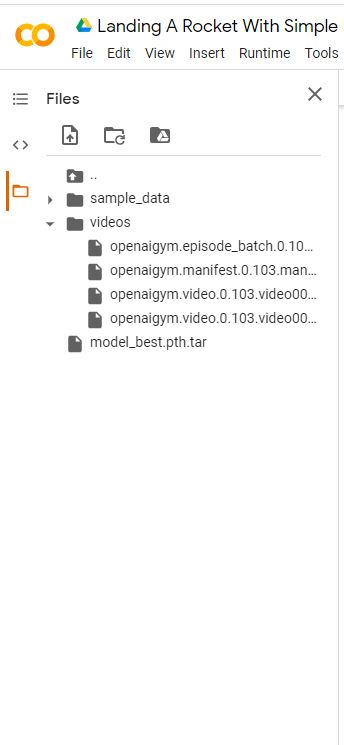


## Works Cited


Byrne, Donal. “Landing A Rocket With Simple Reinforcement Learning.” Medium, Coinmonks, 27 July 2018, medium.com/coinmonks/landing-a-rocket-with-simple-reinforcement-learning-3a0265f8b58c.

Science Institute, W. (n.d.). 2Deep Learning and FeedForward Networks (Simply Explained) .pptx. Retrieved August 07, 2020, from https://docs.google.com/presentation/d/e/2PACX-1vTLeO6zMBVQYICIoQLvVEf2IPJJ31H4vc15nCbuTeSDYib6bLpRCxo5I0iPD8yA5A/pub?start=false

